#Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#Load dataset

In [3]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

**Label	Description**

- 0 = T-shirt/top

- 1 = Trouser

- 2	= Pullover

- 3	= Dress

- 4	= Coat

- 5	= Sandal

- 6	= Shirt

- 7	= Sneaker

- 8	= Bag

- 9	= Ankle boot


#Data Exploration

In [4]:
# Display dataset statistics
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


- The training dataset contains 60,000 images, each with dimensions of 28 pixels X 28 pixels .

- There are 60,000 labels in the training data, one for each image.

- The testing dataset contains 10,000 images, each one also represented as a 28x28 pixel grayscale array.

- There are 10,000 labels corresponding to the 10,000 images in the test dataset.
- There is also one label for each image, 10,000 labels.

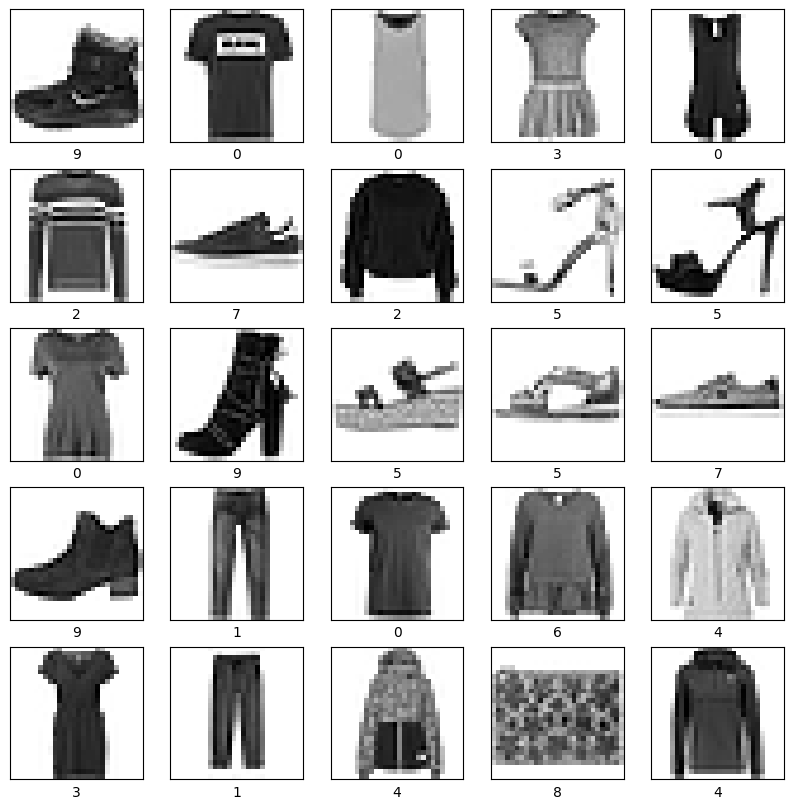

In [5]:
# Visualize sample images

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

- It's evident that some items are being mislabeled. For instance, certain accessories such as high heels are erroneously labeled as ankle boots. Additionally, due to factors like low image resolution, some items are challenging to identify accurately, which could lead to further misclassifications. These observations highlight the need for improvement and adjustments in the data preprocessing and model training phases to ensure more accurate predictions.

##Labels Distribution

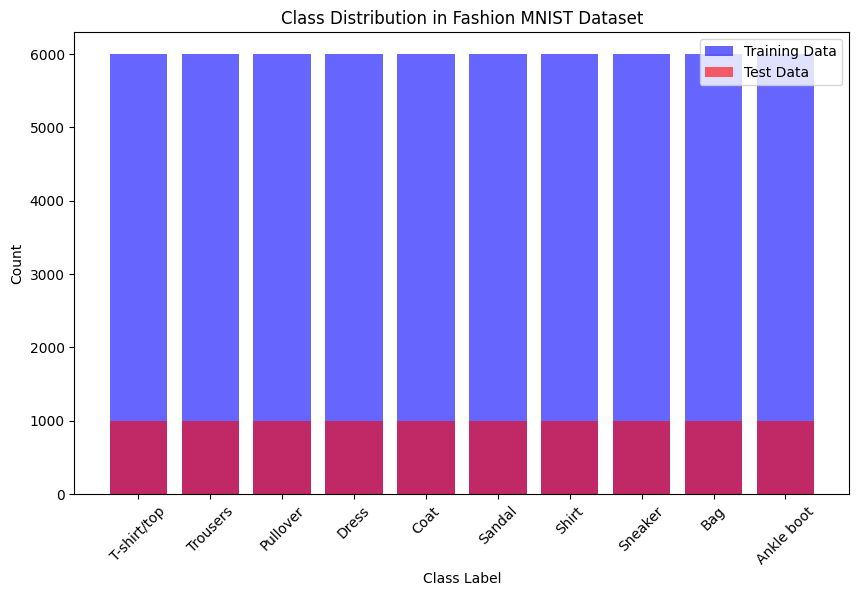

In [6]:
# Count the occurrences of each label in training and test datasets separately
train_label_counts = np.bincount(train_labels)
test_label_counts = np.bincount(test_labels)

# Define class labels
class_labels = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot class distribution for training dataset
plt.figure(figsize=(10, 6))
plt.bar(class_labels, train_label_counts, color='blue', alpha=0.6, label='Training Data')

# Plot class distribution for test dataset
plt.bar(class_labels, test_label_counts, color='red', alpha=0.6, label='Test Data')

plt.title('Class Distribution in Fashion MNIST Dataset')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- Both Training and Testing data have the same distribtuion of labels, which is good as it ensures consistency and balance in the representation of different classes across the datasets.

#Data Preprocessing

##Reshaping

In [7]:
import numpy as np
import tensorflow as tf

# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Before reshaping
print("Before reshaping:")
print("Training images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Reshape the data
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# After reshaping
print("\nAfter reshaping:")
print("Training images shape (flattened):", train_images_flat.shape)
print("Test images shape (flattened):", test_images_flat.shape)


Before reshaping:
Training images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)

After reshaping:
Training images shape (flattened): (60000, 784)
Test images shape (flattened): (10000, 784)


- To ensure that the data is compatible with the required data shapes from some libraries, that images were reshaped from a two-dimensional matrix (for example, 28x28 pixels) into a one-dimensional array (for example, 784 pixels). Thus each pixel can be treated as a separate feature and that makes it easier to apply normalization or standardization to the dataset.

##Normalizing

In [8]:
# Before normalization
print("Before normalization:")
print("Minimum pixel value:", train_images_flat.min())
print("Maximum pixel value:", train_images_flat.max())

# Normalize the data
train_images_normalized = train_images_flat / 255.0
test_images_normalized = test_images_flat / 255.0

# After normalization
print("\nAfter normalization:")
print("Minimum pixel value (normalized):", train_images_normalized.min())
print("Maximum pixel value (normalized):", train_images_normalized.max())


Before normalization:
Minimum pixel value: 0
Maximum pixel value: 255

After normalization:
Minimum pixel value (normalized): 0.0
Maximum pixel value (normalized): 1.0


-  Pixel value of images representing their color vary from 0 to 255, by dividing each pixel value by 255.0, we scale the values down to the range [0, 1] and prevent certain features from dominating the learning process.

#Principal Component Analysis(PCA)

- PCA was utilized to optimally select the number of principal components to reduce dataset dimensionality while preserving maximum variance. This ensures efficient visualization and analysis without losing critical information from the original features.

In [9]:
# Perform PCA with 50 components
pca = PCA(n_components=50)
pca_result = pca.fit_transform(train_images_normalized)

# Create a DataFrame for PCA results with 2 principal components
pca_df = pd.DataFrame(data=pca_result[:, :3], columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = train_labels

print(pca_df)

            PC1       PC2       PC3  label
0     -0.486250  6.404213 -4.749181      9
1      5.521290 -1.771142 -1.023635      0
2     -2.846709 -4.320934  0.416291      0
3      0.123132 -3.847324  0.794435      3
4      3.153409 -4.710466 -2.919126      0
...         ...       ...       ...    ...
59995 -6.765072 -0.163069  1.273533      5
59996 -0.107906 -5.703627 -1.786919      1
59997  3.363726 -4.628393 -2.041937      3
59998 -3.166575 -2.279290  1.883607      0
59999 -7.120250 -0.469582  1.838878      5

[60000 rows x 4 columns]


## PC1 X PC1

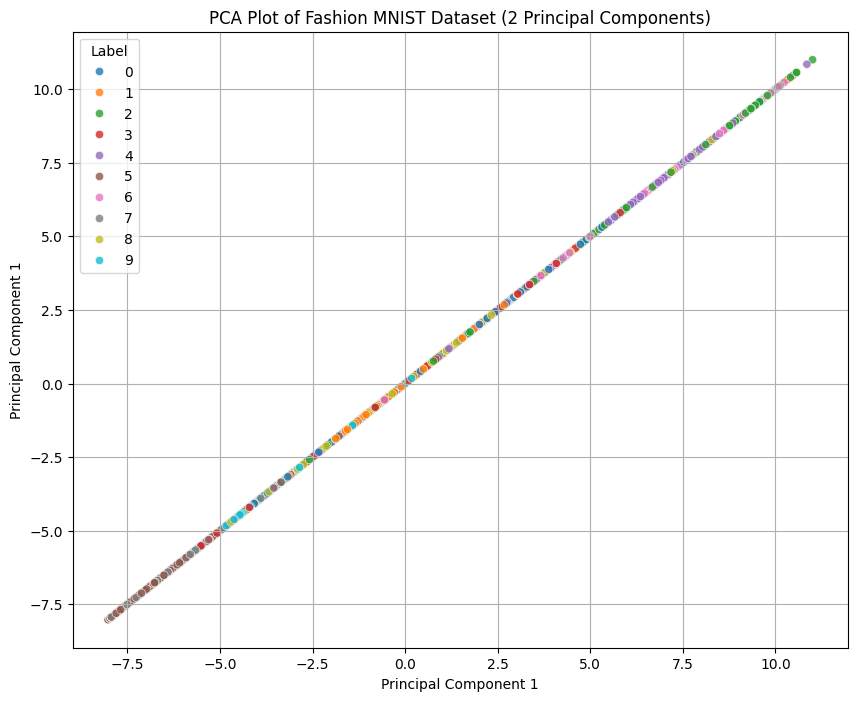

In [10]:
# Plot the PCA results with the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC1', hue='label', data=pca_df, palette='tab10', alpha=0.8)
plt.title('PCA Plot of Fashion MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 1')
plt.legend(title='Label', loc='best')
plt.grid(True)
plt.show()

- The dataset exhibits a significant spread along Principal Component 1 (PC1). Distinguishing distinct clusters solely based on the data points from the same label is challenging when visualizing PC1's plot.

## PC1 X PC2

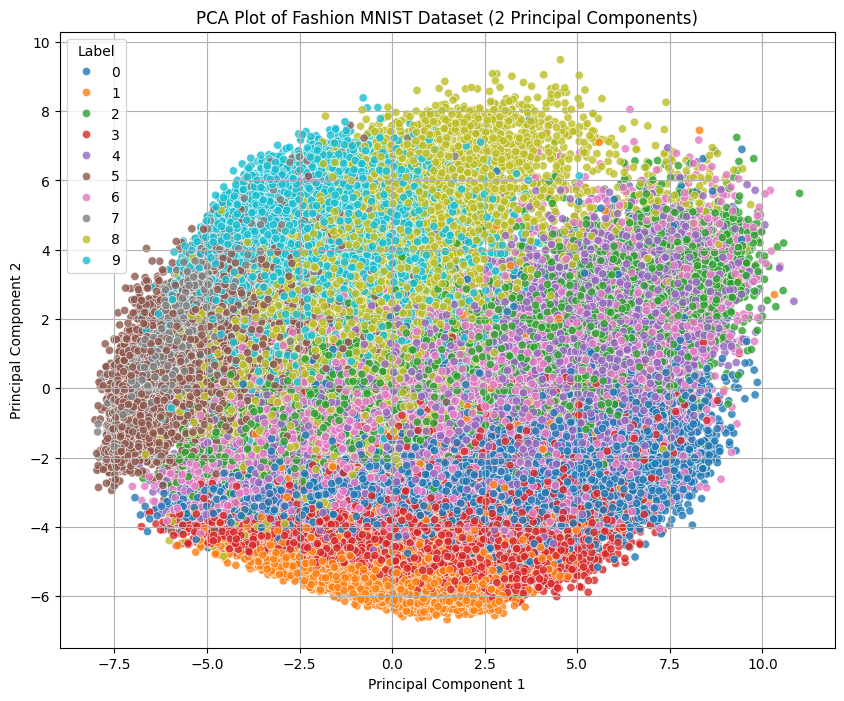

In [11]:
# Plot the PCA results with the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='tab10', alpha=0.8)
plt.title('PCA Plot of Fashion MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='best')
plt.grid(True)
plt.show()

- The distribution of the dataset suggests that it is more effectively spread across Principal Component 2 (PC2). Here, distinct clusters of different labels become discernible as we traverse along the y-axis or PC2 axis. However, differentiation between clusters for the data points is less apparent along the x-axis or PC1 axis.

## PC2 X PC3

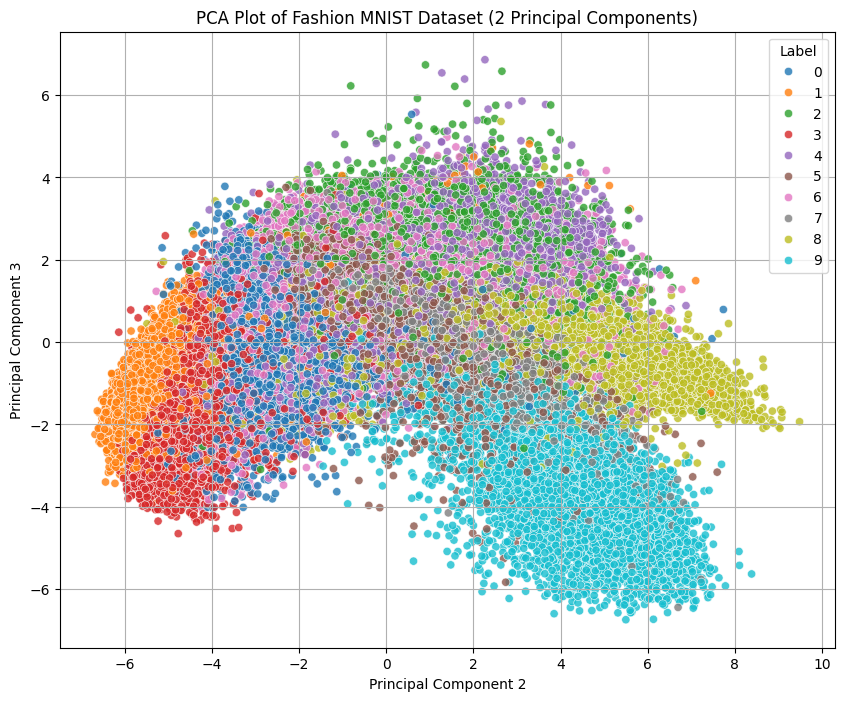

In [12]:
# Plot the PCA results with the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='label', data=pca_df, palette='tab10', alpha=0.8)
plt.title('PCA Plot of Fashion MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.legend(title='Label', loc='best')
plt.grid(True)
plt.show()

- Some label clusters become distinctly visible when we plot PC2 against PC3. This observation implies that PC3 and PC2 capture certain variations in the dataset that contribute to the separation of clusters corresponding to different labels.

## PC1 X PC3

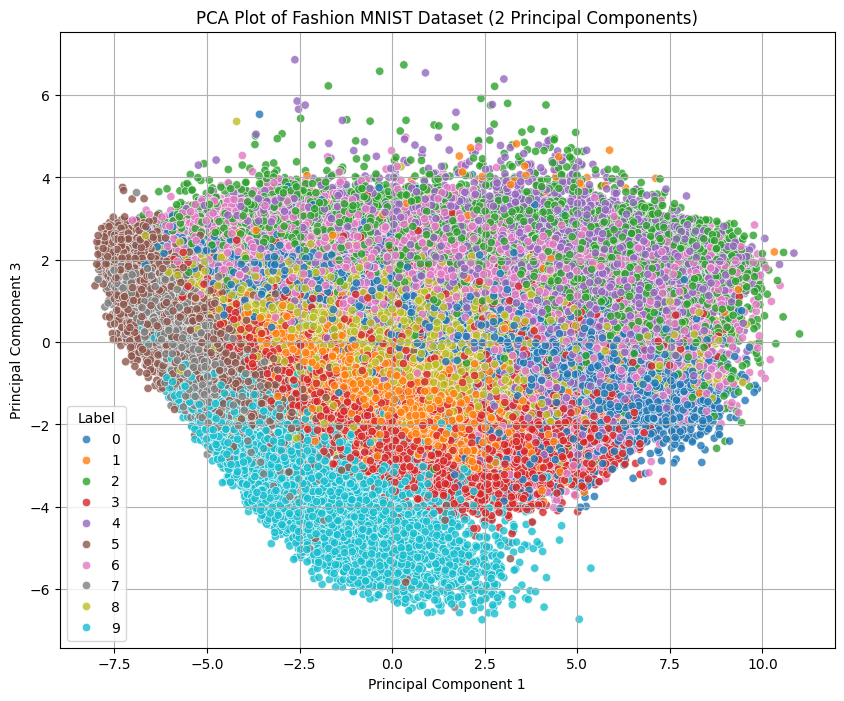

In [13]:
# Plot the PCA results with the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC3', hue='label', data=pca_df, palette='tab10', alpha=0.8)
plt.title('PCA Plot of Fashion MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.legend(title='Label', loc='best')
plt.grid(True)
plt.show()

- Once more, it's evident that PC3 captures a broader spectrum of dataset variations compared to PC1.

## Scree Plot

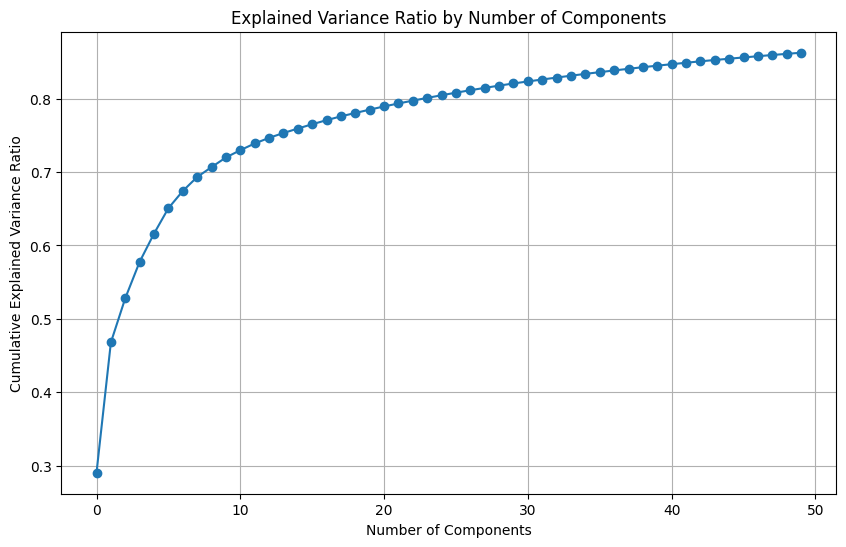

In [14]:
# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

- The scree plot shows how much variance in the original data is explained by each principal component.
- The scree plot elbow's point 50, which is the optimal number of principal components to retain for dimensionality reduction.

In [15]:
print(pca.explained_variance_ratio_)

[0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267 0.00992875 0.00913255
 0.00765793 0.00659706 0.00607851 0.00589821 0.00551934 0.005245
 0.00458079 0.00455515 0.00433684 0.00407097 0.00384758 0.00372551
 0.00361107 0.00350656 0.00333241 0.0031936  0.00308062 0.00293271
 0.002756   0.00265059 0.002637   0.00255828 0.00246208 0.00235894
 0.00230283 0.00225474 0.00218454 0.00209286 0.00200214 0.00195718
 0.00194637 0.0018248  0.00175257 0.00170683 0.00168372 0.00163636
 0.0015977  0.00152715]


- From the explained variance ratio dataframe, we observe that the first two components can account for a substantial portion of the variance in the dataset. Conversely, starting from the 10th component and beyond, the explained variance ratio diminishes significantly, indicating that these additional components contribute relatively little to explaining the overall variance in the data.

- Given the observation that the first few components, such as the second and third, exhibit effective clustering of different labels, retaining only 10 components seems judicious. This choice optimizes dimensionality reduction while preserving a substantial amount of variance in the dataset.

#SVM model

In [16]:
# Perform PCA with 10 components
pca = PCA(n_components=10)
pca_result = pca.fit_transform(train_images_normalized)

**Training Model with Train Data**

In [17]:
# SVM model training
svm_model = SVC(kernel='rbf')
svm_model.fit(pca_result, train_labels)

SVC()

**Testing Model with Testing Data**

In [18]:
# Perform PCA with 10 components
pca = PCA(n_components=10)
test_images_reduced = pca.fit_transform(test_images_normalized)

- Before applying the SVM model to the testing data, it needed to undergo dimensionality reduction through PCA to ensure that both the training and testing datasets are represented in the same reduced-dimensional space, allowing the model to make accurate predictions based on the learned patterns from the training data.

In [19]:
# Model evaluation
predictions = svm_model.predict(test_images_reduced)
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5381


##Confusion Matrix

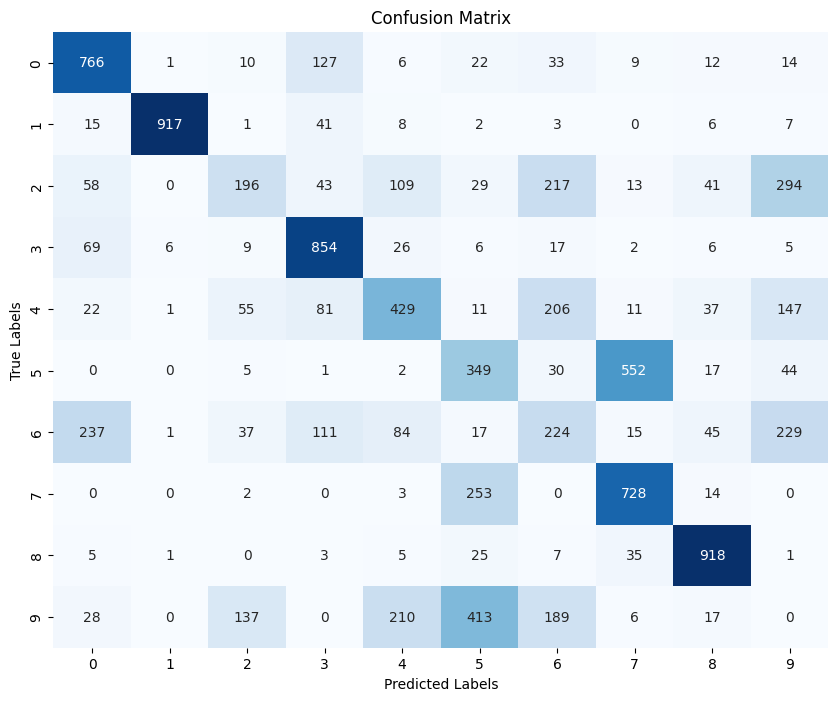

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


- The model performed quite well in predicting labels such as trousers and bags. However, there is room for improvement as the predictions for the "ankle boots" label were consistently incorrect, indicating a notable weakness in the model's performance.

##Classification Report

In [21]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, predictions)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1000
           1       0.99      0.92      0.95      1000
           2       0.43      0.20      0.27      1000
           3       0.68      0.85      0.76      1000
           4       0.49      0.43      0.46      1000
           5       0.31      0.35      0.33      1000
           6       0.24      0.22      0.23      1000
           7       0.53      0.73      0.61      1000
           8       0.82      0.92      0.87      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.54     10000
   macro avg       0.51      0.54      0.52     10000
weighted avg       0.51      0.54      0.52     10000



**Precision:** The average proportion of true positive predictions among all instances predicted as positive for a particular class is quite low(51%).

**Recall:** The overall proportion of true positive predictions among all actual instances belonging to a particular class is a little higher, but still low(54%).

**F1-score**: The mean between precision and recall reflect quite the same result from the 2 analyzed alone(52%).

The model demonstrates good precision for predicting some labels like trouse and bags but the overall performance it not that good. Improvement is needed, particularly for classes with lower precision, recall, and F1-score, such as class 9.

#Hyperparameter Tuning

In [22]:
# Instantiate the SVM model with specific hyperparameters
svm_model = SVC(kernel='rbf', C=0.1, gamma=0.01)

# Train the SVM model
svm_model.fit(pca_result, train_labels)

# Make predictions on the test data
predictions = svm_model.predict(test_images_reduced)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5648


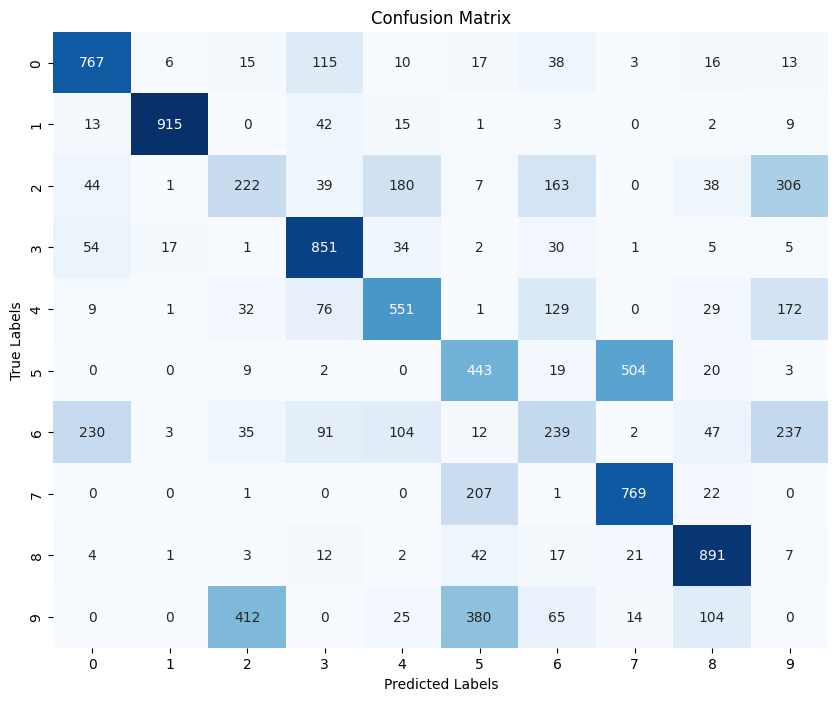

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [24]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, predictions)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.97      0.92      0.94      1000
           2       0.30      0.22      0.26      1000
           3       0.69      0.85      0.76      1000
           4       0.60      0.55      0.57      1000
           5       0.40      0.44      0.42      1000
           6       0.34      0.24      0.28      1000
           7       0.59      0.77      0.66      1000
           8       0.76      0.89      0.82      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.56     10000
   macro avg       0.53      0.56      0.54     10000
weighted avg       0.53      0.56      0.54     10000



In [26]:
# Instantiate the SVM model with specific hyperparameters
svm_model = SVC(kernel='rbf', C=10, gamma=0.0001)

# Train the SVM model
svm_model.fit(pca_result, train_labels)

# Make predictions on the test data
predictions = svm_model.predict(test_images_reduced)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5411


In [31]:
# Instantiate the SVM model with specific hyperparameters
svm_model = SVC(kernel='rbf', C=1, gamma=0.0001)

# Train the SVM model
svm_model.fit(pca_result, train_labels)

# Make predictions on the test data
predictions = svm_model.predict(test_images_reduced)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5685


- Lowering the gamma parameter tends to improve accuracy, suggesting that a wider gamma provides better generalization. However, the model's accuracy peaks at C=1, indicating that moderate regularization is optimal. Beyond this point, increasing C may lead to overfitting and decreased performance.

In [34]:
# Instantiate the SVM model with specific hyperparameters
svm_model = SVC(kernel='rbf', C=1, gamma=0.00001)

# Train the SVM model
svm_model.fit(pca_result, train_labels)

# Make predictions on the test data
predictions = svm_model.predict(test_images_reduced)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5709


- Lowering the values of gamma makes each data point to have a more global influence. This results in a smoother decision boundary that may generalize better to unseen data and it helped to increase the model's accuracy. Nevertheless a extremely low gamma could potentially underfit the training data.

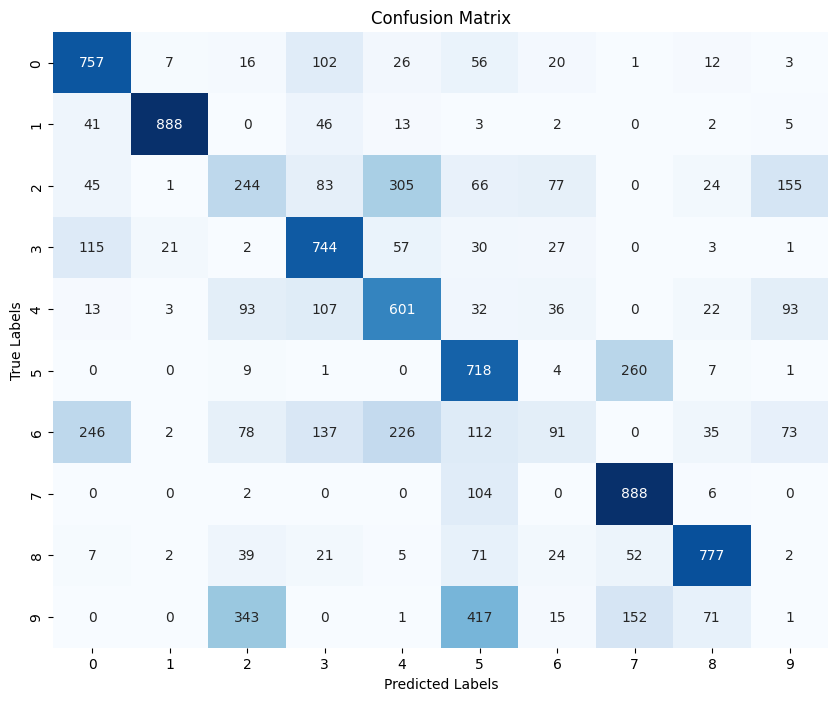

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


- The model has shown improvement in predicting certain labels, notably ankle boots, which it struggled with previously. However, there has been a slight decline in the accuracy of predicting other labels such as trousers and bags. Despite this decline, the decrease in predictions for these labels is relatively minor, suggesting that the overall impact is manageable.

In [37]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(test_labels, predictions)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68      1000
           1       0.96      0.89      0.92      1000
           2       0.30      0.24      0.27      1000
           3       0.60      0.74      0.66      1000
           4       0.49      0.60      0.54      1000
           5       0.45      0.72      0.55      1000
           6       0.31      0.09      0.14      1000
           7       0.66      0.89      0.75      1000
           8       0.81      0.78      0.79      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.57     10000
   macro avg       0.52      0.57      0.53     10000
weighted avg       0.52      0.57      0.53     10000



- **Precision:** The average precision, representing the proportion of true positive predictions among all instances predicted as positive for a specific class, has increased to 52%.

- **Recall:** The overall recall, indicating the proportion of true positive predictions among all actual instances belonging to a particular class, has also improved to 57%.

- **F1-score:** The F1-score, the harmonic mean of precision and recall, now stands at 53%, reflecting a balanced performance between precision and recall.

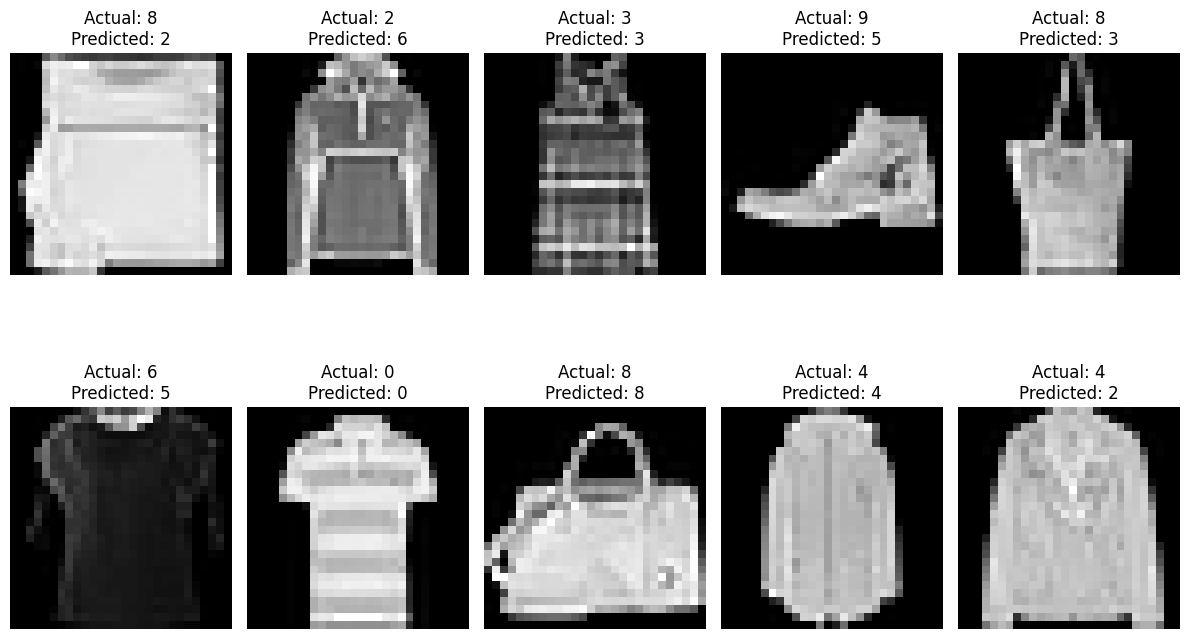

In [38]:
# Define the number of images to display
num_images = 10

# Select random indices of test images
indices = np.random.choice(len(test_images_reduced), num_images, replace=False)

# Plot the selected images with actual and predicted labels
plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    plt.subplot(2, num_images // 2, i + 1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"Actual: {test_labels[idx]}\nPredicted: {predictions[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

- The hyperparameter tuning process involved increasing C values and lowering gamma values, which contributed to improving the model's accuracy. However, despite these adjustments, the accuracy still falls short of expectations. This suggests that there is room for further improvement in the model's predictions. Exploring additional techniques such as feature selection using methods like k-best or incorporating a greater number of components beyond 10 could potentially enhance the model's performance. While components beyond the 10th may not individually contribute significantly, collectively, they could still play a role in improving the model's predictive capabilities. Therefore, exploring these avenues for refinement could lead to better overall performance and predictive accuracy.